# 전기전자공학101 [EEE2113-02] 2020
## ※ Linear Regression과 Deep Learning의 이해

---


Reference : DS & AI Lab , Yonsei University

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. 문제 정의

2차원 직교 좌표계에서 임의의 data 생성

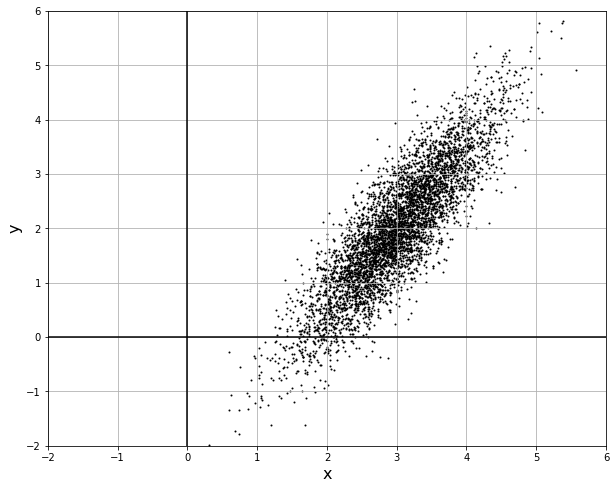

In [2]:
# 데이터를 num_samples의 수만큼 임의로 생성합니다.
num_samples = 5000
data = np.random.multivariate_normal([3, 2], [[0.5, 0.7], [0.7, 1.3]], num_samples)
x_data = data[:, 0]
y_data = data[:, 1]

# 생성된 데이터를 2차원 평면에 표현합니다.
plt.figure(figsize=(10, 8))
plt.scatter(x_data, y_data, c='k', s=1)
plt.axis([-2, 6, -2, 6])
plt.axvline(x=0, color='k', linestyle='-')
plt.axhline(y=0, color='k', linestyle='-')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.grid(True)
plt.show()

<b>Linear regression</b>의 목표는 data 집합의 <b> 경향성을 가장 잘 표현할 수 있는 직선 $y=ax+b$ 를 찾는 것</b>입니다.

임의의 직선이 data의 경향성을 얼마나 나타내는지 확인할 수 있다.

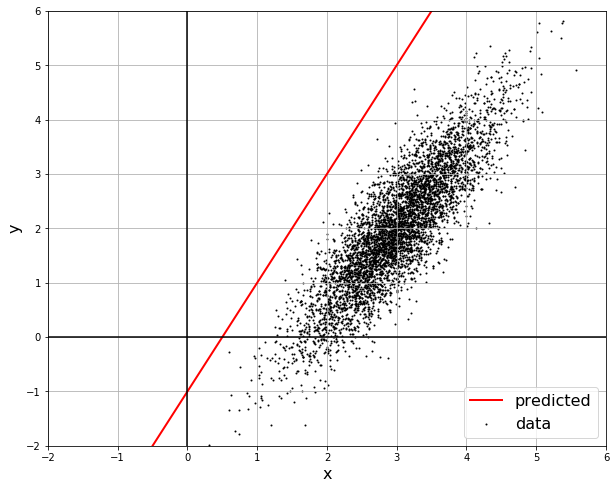

In [ ]:
a_hypothesis = 2    # 직선의 기울기
b_hypothesis = -1   # 직선의 y절편

def plot_prediction(a, b):
    # 예측된 직선을 그리기 위해 특정 범위 안에서 가능한 많은 x값들에 대한 y값을 계산합니다.
    xrange = np.linspace(-2, 6, 1000)
    y_predicted = a * xrange + b

    # 생성된 데이터와 예측된 직선을 2차원 평면에 표현합니다.
    plt.figure(figsize=(10, 8))
    plt.scatter(x_data, y_data, c='k', s=1, label='data')
    plt.plot(xrange, y_predicted, 'r', linewidth=2, label='predicted')
    plt.axis([-2, 6, -2, 6])
    plt.axvline(x=0, color='k', linestyle='-')
    plt.axhline(y=0, color='k', linestyle='-')
    plt.xlabel('x', fontsize=16)
    plt.ylabel('y', fontsize=16)
    plt.grid(True)
    plt.legend(fontsize=16)
    plt.show()
    
plot_prediction(a_hypothesis, b_hypothesis)

predicted graph와 data 사이의 오차의 척도를 계산할 필요가 있다.

## 2. 오차 계산

실제 데이터의 $y$좌표와 예측된 그래프 $y$좌표의 RMS(root mean square)을 사용해서 오차를 예측해볼 수 있다.

$$ J(a, b) = \frac{1}{2m} \sum_{i=1}^{m}\left( y_{pred}^{(i)} - y^{(i)} \right)^2= \frac{1}{2m} \sum_{i=1}^{m}\left( ax^{(i)} + b - y^{(i)} \right)^2 $$

위와 같은 식을  <b>손실 함수</b>(cost function 혹은 loss function)라고 한다. 실제 $y$좌표 $y^{(i)}$와 임의로 가정한 직선으로부터 예측된 $y$좌표 $ y^{(i)}_{pred} = ax^{(i)} + b $의 차이의 제곱을 모든 $m$개의 데이터에 대해서 다 계산한 뒤 평균을 취하고 2로 나눈다.

이를 기준으로 위의 직선에 대하여 현재의 오차(loss)를 계산하면 아래와 같다.

In [4]:
def compute_loss(a, b, x_ref, y_ref, print_output=True):
    y_predicted = x_ref * a + b
    loss = np.mean((y_ref - y_predicted) ** 2) / 2
    
    if print_output:
        print("Loss with y = {:.4f}x{:+.4f} : {:.4f}".format(a, b, loss))
    
    return loss

_ = compute_loss(2, -1, x_data, y_data)

Loss with y = 2.0000x-1.0000 : 4.7430


 $y=ax+b$ 이 위의 데이터를 가장 잘 표현하는 그래프일 때, loss는 최소가 된다

따라서 linear regression의 goal은 <b> loss를 최소화하는 $a$와 $b$의 값을 찾는 것</b>!!

## 3. 파라미터 갱신

**딥러닝(deep learning)**을 포함한 **기계학습(machine learning)**에서는 위의 직선과 같이 데이터를 수학적으로 표현한 것을 <b>모델(model)</b>이라고 부르며, 그 모델을 결정하는 데 필요한 값들을 <b>파라미터(parameter)</b>라고 한다. 손실 함수 $J(a, b)$를 기준으로 데이터들로부터 최적의 파라미터 $a$와 $b$를 찾을 수 있다.

a,b를 찾는 가장 단순한 방법은 모든 가능한 $(a, b)$ 조합에 대해서 loss를 계산하고 이 가운데 가장 작은 loss를 만드는 $a$ 와 $b$를 고르는 것이다.

$b$를 $-1$로 고정시키고 모든 가능한 $a$ 값들에 대해서 loss를 계산해 보자.

Loss is minimized to 0.199 when a = 0.9898989898989901


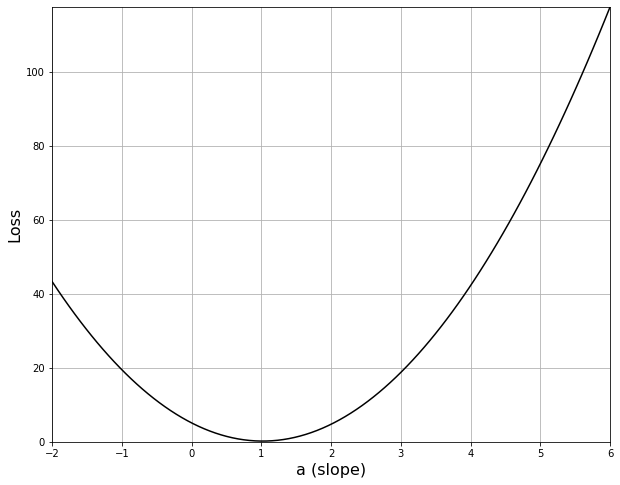

In [5]:
def plot_loss_curve(x_ref, y_ref):
    candidate = np.linspace(-2, 6, 100)
    loss = []
    for val in candidate:
        loss.append(compute_loss(val, -1, x_ref, y_ref, print_output=False))
    
    plt.figure(figsize=(10, 8))
    plt.plot(candidate, loss, 'k')
    plt.grid(True)
    plt.xlim(-2, 6)
    plt.ylim(0, np.max(loss))
    plt.xlabel('a (slope)', fontsize=16)
    plt.ylabel('Loss', fontsize=16)

    a_opt = candidate[np.argmin(loss)]
    print("Loss is minimized to {:.3f} when a = {}".format(np.min(loss), a_opt))
    
plot_loss_curve(x_data, y_data)

문제에서 가정한 손실 함수는 $a$에 관한 이차함수이기 때문에 $a$ 값을 바꾸면서 loss의 값을 계산하면 그 그래프는 위와 같이 포물선의 형태로 나타나고, 그 최솟값은 포물선의 꼭짓점에서 얻어진다.
이제 $b$의 값 역시 바꾸어 가면서 최소 loss의 값을 비교해보면 가장 loss를 최소화하는 $a$와 $b$의 조합을 찾을 수 있다.

그러나 실제 데이터들은 직선 하나만으로 표현하기에 너무나 복잡하고, 따라서 이들을 <b>모델링</b>(modeling, 데이터를 표현할 수학적인 표현, 즉 모델을 찾는 과정)하기 위해서는 더욱 많은 파라미터들을 사용해야만 한다. 실제로 현재 상용화되어 사용되고 있는 모델들은 수백만, 혹은 수천만 개의 파라미터들을 사용하여 데이터를 모델링하고 있으므로 Performance가 현저히 떨어지게 된다.

최적의 파라미터를 찾기 위한 또 한 가지 방법은 선형대수 혹은 해석학적인 계산을 통해 정확한 해를 찾는 것이다. (11주차 강의자료 11페이지 하단 참조) 하지만 이 역시 데이터가 아주 많거나 손실 함수가 복잡한 경우에는 계산량의 측면에서 시간 지연이 생긴다.

가장 효율적인 방법은 <b>파라미터의 값을 아주 조금씩 변화시키면서 loss의 변화를 관찰하고, 이에 따라 점차적으로 파라미터의 값을 갱신</b>하는 것이다.

한 번 $a = 2, b = -1$을 기준으로 $a$의 값을 $1$만큼 줄여본 뒤에 loss 값을 확인해보자.

In [6]:
_ = compute_loss(a=2, b=-1, x_ref=x_data, y_ref=y_data)
_ = compute_loss(a=1, b=-1, x_ref=x_data, y_ref=y_data)

Loss with y = 2.0000x-1.0000 : 4.7430
Loss with y = 1.0000x-1.0000 : 0.1970


$a$ 값을 2에서 1로 바꾸니 loss가 크게 줄어든 것을 확인할 수 있다. 이제 $a$를 1만큼 더 줄여 확인해 보자.

In [7]:
_ = compute_loss(a=0, b=-1, x_ref=x_data, y_ref=y_data)

Loss with y = 0.0000x-1.0000 : 5.1094


a=0때에는 오차가 더 커졌다. 따라서 $a = 1$ 주위에서 간격을 0.01로 줄이고 $a$의 값을 키우거나 줄인 뒤 다시 loss를 확인해 볼 수 있다.

In [8]:
_ = compute_loss(a=0.99, b=-1, x_ref=x_data, y_ref=y_data)
_ = compute_loss(a=1, b=-1, x_ref=x_data, y_ref=y_data)
_ = compute_loss(a=1.01, b=-1, x_ref=x_data, y_ref=y_data)

Loss with y = 0.9900x-1.0000 : 0.1993
Loss with y = 1.0000x-1.0000 : 0.1970
Loss with y = 1.0100x-1.0000 : 0.1956


<br>만약 두 값 모두 $a$가 1일 때보다 크다면 탐색하는 간격을 더욱 줄여야 할 것이고, 한 쪽의 값이 더 작다면 그 값을 기준으로 다시 주위의 loss값을 확인하면 된다. 이를 반복해서 $a$의 값을 갱신하고 탐색 범위를 좁혀나가다 보면 우리는 어느 순간 loss를 가장 작게 만드는 최적의 $a$ 값(혹은 그와 아주 가까운 값)에 도달할 수 있다.

다만, 우리가 하고 싶은 것은 이러한 탐색 과정을 컴퓨터가 알아서 처리할 수 있도록 **자동화**하는 것! 이건 어떻게 할 수 있을까?

이를 위하여 필요한 2가지 정보는 아래와 같다. 이들을 정확한 계산을 통해 자동적으로 구해야 한다.
- (1) $a$의 값을 키울지 줄일지 (방향)
- (2) $a$의 값을 얼마나 변화시킬지 (크기)

그리고 이러한 정보를 얻기 위한 효율적인 방법 중 하나는 특정한 $a$ 값에 대하여 손실 함수의 **기울기(gradient)**를 계산하는 것이다.

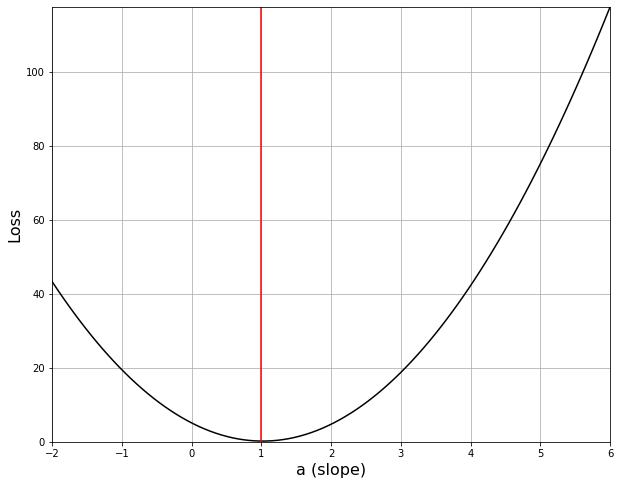

In [9]:
def plot_loss_curve(x_ref, y_ref):
    candidate = np.linspace(-2, 6, 100)
    loss = []
    
    for val in candidate:
        loss.append(compute_loss(val, -1, x_ref, y_ref, print_output=False))
    
    plt.figure(figsize=(10, 8))
    plt.plot(candidate, loss, 'k')
    plt.grid(True)
    plt.xlim(-2, 6)
    plt.ylim(0, np.max(loss))
    plt.xlabel('a (slope)', fontsize=16)
    plt.ylabel('Loss', fontsize=16)
    plt.axvline(x=0.989, color='r', linestyle='-')
    
plot_loss_curve(x_data, y_data)

만약 $a$의 값이 포물선의 축보다 오른쪽에 있다면 $a$의 값을 줄여야 한다.<br>이 오른쪽에 있는 점들은 공콩적으로 접선의 기울기가 모두 양수의 값을 가진다.<br>반대로, $a$의 값이 왼쪽에 있다면 우리는 $a$의 값을 키워야 하는데, 이 점들은 모두 접선의 기울기가 음수의 값을 가진다.<br>즉, 특정한 $a$ 값에 대해서 **기울기가 0보다 크다면 $a$값을 줄여야 하고, 기울기가 0보다 작다면 $a$값을 키워야 한다.**

변화의 크기 관점에서 확인해 보자.<br>축으로부터 멀리 떨어져 있을수록 우리는 $a$의 값을 더욱 많이 변화시켜야 하는데, <br>위의 포물선을 확인해보면 축에서 멀리 떨어질수록 기울기의 크기 역시 커지게 된다.<br>즉, **기울기가 클 수록 $a$의 값을 크게 변화시켜야 하고 기울기가 작을 수록 $a$의 값을 작게 변화시켜야 한다.**

이 2가지 정보를 이용하여 파라미터를 갱신하기 위한 규칙을 다음과 같이 정의할 수 있다.

### $$ a_{new} = a - \alpha\frac{\partial J(a, b)}{\partial a} $$

이 식을 통해 얻어지는 새로운 $a$의 값 $a_{new}$은 기울기가 0보다 크면 (즉, $ \frac{\partial J(a, b)}{\partial a} > 0 $) 기존의 $a$값보다 작아지고, 반대의 경우($ \frac{\partial J(a, b)}{\partial a} < 0 $)에는 기존의 값보다 커진다. 값의 변화량은 기울기의 크기에 비례하는데, 실제 $a$ 값에 적용될 때에는 임의의 양의 상수 $\alpha$가 곱해져 변화의 크기를 조절한다. 이때 곱해지는 상수값 $\alpha$을 **학습률(learning rate)**이라고 부른다.

이와 같은 파라미터 갱신 방법이 **경사 하강법 (gradient descent)**이다.

위의 예제를 경사 하강법을 통해 구해 보자. 먼저 각 파라미터 $a$, $b$에 대한 손실 함수의 미분값을 계산한다.

### $$ J(a, b) = \frac{1}{2m} \sum_{i=1}^{m}\left( ax^{(i)} + b - y^{(i)} \right)^2 $$

### $$ \frac{\partial J(a, b)}{\partial a} = \frac{1}{2m} \sum_{i=1}^{m}2\left( ax^{(i)} + b - y^{(i)} \right)\times x^{(i)} = \frac{1}{m} \sum_{i=1}^{m}x^{(i)}\left( ax^{(i)} + b - y^{(i)} \right) $$

### $$ \frac{\partial J(a, b)}{\partial b} = \frac{1}{2m} \sum_{i=1}^{m}2\left( ax^{(i)} + b - y^{(i)} \right)\times 1 = \frac{1}{m} \sum_{i=1}^{m} \left( ax^{(i)} + b - y^{(i)} \right) $$

파라미터 갱신은 아래 공식으로 나타난다.

### $$ a_{new} = a - \alpha\frac{\partial J(a, b)}{\partial a} = a - \frac{\alpha}{m} \sum_{i=1}^{m}x^{(i)}\left( ax^{(i)} + b - y^{(i)} \right) $$

### $$ b_{new} = b - \alpha\frac{\partial J(a, b)}{\partial b} = b - \frac{\alpha}{m} \sum_{i=1}^{m}\left( ax^{(i)} + b - y^{(i)} \right) $$

이를 코드로 구현해 보자.

In [10]:
def update_params(a_old, b_old, x_ref, y_ref, learning_rate):
    diff = a_old * x_ref + b_old - y_ref
    a_new = a_old - learning_rate * np.mean(x_ref * diff)
    b_new = b_old - learning_rate * np.mean(diff)
    return a_new, b_new

임의의 값으로부터 파라미터를 갱신해 보면

In [11]:
# 파라미터 초기화
a_init, b_init = 2, -1

# 갱신 전 loss 계산
loss_before = compute_loss(a_init, b_init, x_data, y_data)

# 파라미터 갱신
a_new, b_new = update_params(a_init, b_init, x_data, y_data, learning_rate=0.1)
print("New a: {:.4f}, New b: {:.4f}".format(a_new, b_new))

# 갱신 후 loss 계산
loss_after = compute_loss(a_new, b_new, x_data, y_data)

Loss with y = 2.0000x-1.0000 : 4.7430
New a: 1.0725, New b: -1.2998
Loss with y = 1.0725x-1.2998 : 0.1873


loss가 줄어든 것을 확인할 수 있다.

Loss with y = 2.0000x-1.0000 : 4.7430
| Iteraion 01 | a: 1.7217,  b: -1.0899  =>  Loss: 2.3376
| Iteraion 02 | a: 1.5305,  b: -1.1522  =>  Loss: 1.2001
| Iteraion 03 | a: 1.3991,  b: -1.1954  =>  Loss: 0.6621
| Iteraion 04 | a: 1.3089,  b: -1.2255  =>  Loss: 0.4077
| Iteraion 05 | a: 1.2470,  b: -1.2466  =>  Loss: 0.2874
| Iteraion 06 | a: 1.2046,  b: -1.2615  =>  Loss: 0.2305
| Iteraion 07 | a: 1.1755,  b: -1.2722  =>  Loss: 0.2035
| Iteraion 08 | a: 1.1557,  b: -1.2799  =>  Loss: 0.1907
| Iteraion 09 | a: 1.1421,  b: -1.2856  =>  Loss: 0.1847
| Iteraion 10 | a: 1.1330,  b: -1.2899  =>  Loss: 0.1818
| Iteraion 11 | a: 1.1268,  b: -1.2932  =>  Loss: 0.1803
| Iteraion 12 | a: 1.1226,  b: -1.2959  =>  Loss: 0.1797
| Iteraion 13 | a: 1.1199,  b: -1.2982  =>  Loss: 0.1793
| Iteraion 14 | a: 1.1182,  b: -1.3001  =>  Loss: 0.1791
| Iteraion 15 | a: 1.1171,  b: -1.3018  =>  Loss: 0.1790
| Iteraion 16 | a: 1.1165,  b: -1.3034  =>  Loss: 0.1789
| Iteraion 17 | a: 1.1162,  b: -1.3049  =>  Loss: 

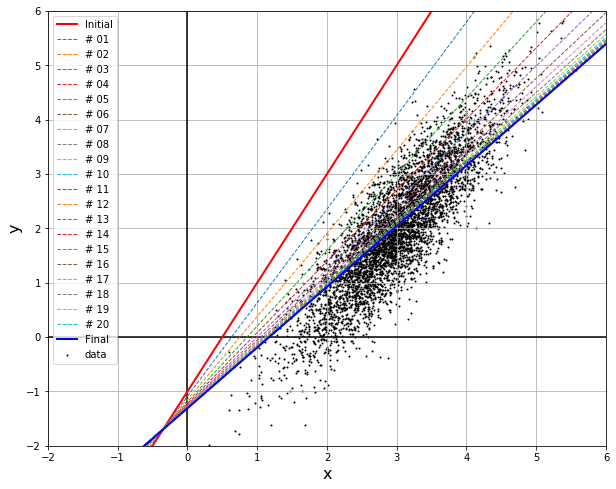

In [12]:
def train(a_init, b_init, num_iterations, learning_rate):
    # a_init, b_init: 기울기와 y절편의 초깃값
    # num_iterations: 파라미터를 갱신할 횟수
    # learning_rate: 학습률
    
    # 예측 결과를 그리기 위한 코드입니다.
    xrange = np.linspace(-2, 6, 1000)
    plt.figure(figsize=(10, 8))
    plt.xlabel('x', fontsize=16)
    plt.ylabel('y', fontsize=16)
    plt.axis([-2, 6, -2, 6])
    plt.grid(True)
    plt.axvline(x=0, color='k', linestyle='-')
    plt.axhline(y=0, color='k', linestyle='-')
    plt.scatter(x_data, y_data, c='k', s=1, label='data')
    y_predicted = xrange * a_init + b_init
    plt.plot(xrange, y_predicted, 'r', linewidth=2, label='Initial')
    
    # 초기 파라미터값으로부터 loss를 계산합니다.
    loss_init = compute_loss(a_init, b_init, x_data, y_data)
    
    # 연속적으로 파라미터의 값을 갱신합니다.
    a, b = a_init, b_init
    for i in range(1, num_iterations + 1):
        # 파라미터 갱신
        a, b = update_params(a, b, x_data, y_data, learning_rate)
        
        # 갱신 뒤의 loss 계산
        loss = compute_loss(a, b, x_data, y_data, print_output=False)
        
        # plot
        y_predicted = a * xrange + b
        plt.plot(xrange, y_predicted, '--', linewidth=1, label='# {:02d}'.format(i))
        
        print("| Iteraion {:02d} | a: {:.4f},  b: {:.4f}  =>  Loss: {:.4f}".format(i, a, b, loss))

    plt.plot(xrange, y_predicted, 'b', linewidth=2, label='Final')
    plt.legend(fontsize=10)
    plt.show()
    
train(a_init=2, b_init=-1, num_iterations=20, learning_rate=0.03)

파라미터를 갱신함에 따라 loss가 점점 줄어들고 직선이 점차 데이터에 가까워진다.

위처럼 연속적으로 파라미터를 갱신하며 최적의 파라미터를 찾아가는 과정을 보통 모델을 **훈련(train)**한다고 말한다.<br>현재 모델 훈련에 있어서 우리가 개입할 수 있는 요소는 파라미터($a$와 $b$)의 초깃값, 훈련 횟수(num_iterations) 그리고 학습률(learning rate)이다.
<br>이러한 값들은 **하이퍼파라미터(hypterparameter)**라고 불리는데, 이들은 모델의 훈련 결과에 매우 큰 영향을 끼칩니다.